In [101]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature 
from skimage.morphology import disk, square


/tmp/ipykernel_18779/2875612852.py:7: UserWarning: Possible precision loss converting image of type uint64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  am = np.array(skimage.filters.rank.mean(am, footprint=disk(3)), dtype="uint8") // 8
/usr/lib64/python3.11/site-packages/skimage/util/dtype.py:541: UserWarning: Downcasting uint64 to uint8 without scaling because max value 254 fits in uint8
  return _convert(image, np.uint8, force_copy)
/tmp/ipykernel_18779/2875612852.py:8: UserWarning: Possible precision loss converting image of type uint64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  bm = np.array(skimage.filters.rank.mean(bm, footprint=disk(3)), dtype="uint8") // 8
/usr/lib64/python3.11/site-packages/skimage/util/dtype.py:541: UserWarning: Downcasting uint64 to uint8 without scaling because max value 255 fits in uint8
  return _convert(image, np.uin

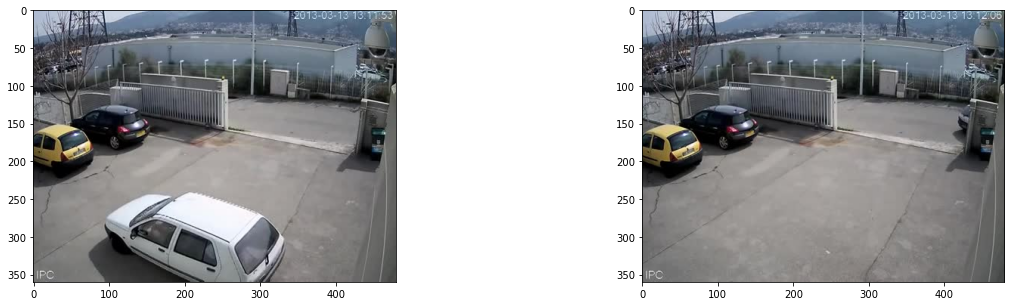

In [199]:
a = imread("./frame.jpg")
b = imread("./bg.jpg")

am = np.sum(a, axis=-1) // 3
bm = np.sum(b, axis=-1) // 3

am = np.array(skimage.filters.rank.mean(am, footprint=disk(3)), dtype="uint8") // 8
bm = np.array(skimage.filters.rank.mean(bm, footprint=disk(3)), dtype="uint8") // 8

#am = np.mean(np.array(a, dtype="float"), axis=-1)
#bm = np.mean(np.array(b, dtype="float"), axis=-1)


npoints=8
radius=3


af = np.asarray(skimage.feature.local_binary_pattern(am, npoints, radius), dtype="uint8")
bf = np.asarray(skimage.feature.local_binary_pattern(bm, npoints, radius), dtype="uint8")


fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].imshow(a, cmap="gray")
axes[1].imshow(b, cmap="gray")

In [200]:
m = np.minimum(a,b)
M = np.maximum(a,b)
#r = np.true_divide(m, M)
a_lab = skimage.color.rgb2lab(a)
b_lab = skimage.color.rgb2lab(b)
r = skimage.color.deltaE_cie76(a_lab, b_lab)

#r = np.linalg.norm(M - m, axis=-1) / 255.

#r = np.where(M > 0, np.linalg.norm((M-m)/255., axis=-1)[:,:,np.newaxis], 0)

(-0.5, 479.5, 359.5, -0.5)

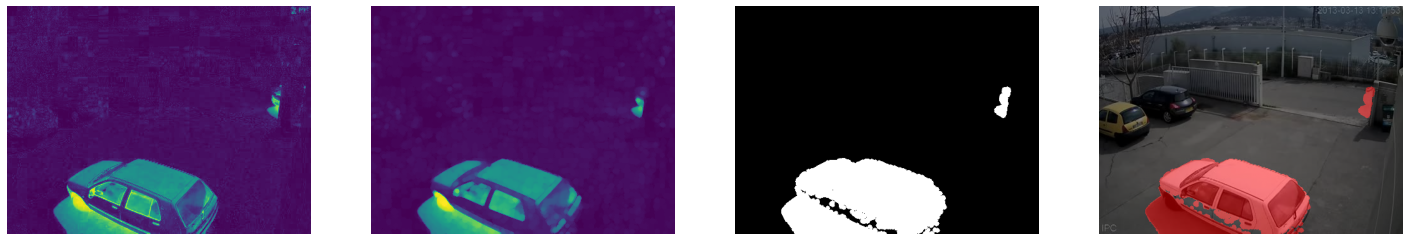

In [217]:
aff = np.unpackbits(np.atleast_3d(af), axis=-1)
bff = np.unpackbits(np.atleast_3d(bf), axis=-1)
hdistance = (aff != bff).sum(axis=-1) / 8.

consensus = np.maximum(r, hdistance)

r2 = skimage.morphology.opening(r, disk(3))
r3 = skimage.filters.apply_hysteresis_threshold(r2, 4, 30)
r4 = a * (0.5 / 255.) + r3[:,:,np.newaxis] * np.array([[[0.5,0,0]]])

fig, axes = plt.subplots(1,4, figsize=(25,5))
ax = axes[0].imshow(r); ax.axes.axis("off")
ax = axes[1].imshow(r2); ax.axes.axis("off")
ax = axes[2].imshow(r3, cmap="gray"); ax.axes.axis("off")
ax = axes[3].imshow(r4); ax.axes.axis("off")
#fig.colorbar(ax)


Text(0.5, 1.0, 'Hysteresis')

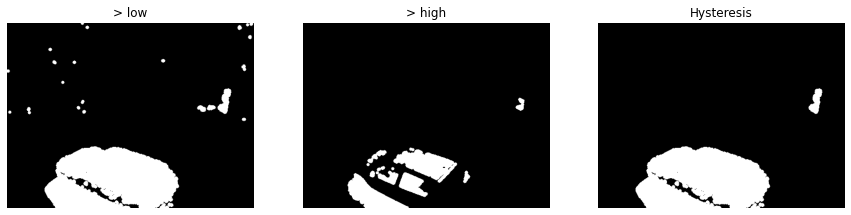

In [234]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

ax = axes[0].imshow(r2 >= 4, cmap="gray"); ax.axes.axis("off"); axes[0].set_title("> low")
ax = axes[1].imshow(r2 >= 30, cmap="gray"); ax.axes.axis("off"); axes[1].set_title("> high")
ax = axes[2].imshow(r3, cmap="gray"); ax.axes.axis("off"); axes[2].set_title("Hysteresis")
